<a href="https://www.kaggle.com/code/anthonynam/mobile-price-prediction?scriptVersionId=140447431" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Install Library

In [1]:
!pip install scikit-learn

In [2]:
!pip install numpy==1.22.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 48.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.
chex 0.1.81 requires numpy>=1.25.0, but you have numpy 1.22.4 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.22.4 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.11.1 which is incompatible.
ydata-profiling 4.3.1 requires scipy<1.11,>=1.4.1, but you have scipy 1.11.1 which is incompatible.


# Import Library

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score,f1_score,confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold,GridSearchCV
from sklearn.preprocessing import MinMaxScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Scikit-learn Gradient Boosting

## Import Dataset

In [4]:
ds = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
ds.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
# Checking Missing Values
ds.isna().sum().sum() # => No missing Value

0

## Split Dataset

In [6]:
X = ds.loc[:,ds.columns != "price_range"]
y = ds.loc[:,ds.columns == "price_range"]

X_train_all, X_test,y_train_all,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
X_train, X_val, y_train,y_val = train_test_split(X_train_all,y_train_all, test_size = 0.2, random_state = 42)

print(f"X_train_all shape: {X_train_all.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print("")
print(f"y_train_all shape: {y_train_all.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_all shape: (1600, 20)
X_train shape: (1280, 20)
X_val shape: (320, 20)
X_test shape: (400, 20)

y_train_all shape: (1600, 1)
y_train shape: (1280, 1)
y_val shape: (320, 1)
y_test shape: (400, 1)


In [7]:
X_train_all.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,1240.808750,0.490625,1.513625,0.515000,4.310000,0.52250,32.270000,0.502562,140.633750,4.542500,9.878125,644.226250,1249.091875,2116.131250,12.220000,5.705625,10.956875,0.763125,0.505000,0.498750
std,440.727396,0.500068,0.820189,0.499931,4.339288,0.49965,18.195165,0.286882,35.338171,2.289972,6.014847,445.436918,431.530171,1080.711326,4.205372,4.338863,5.507742,0.425298,0.500131,0.500155
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.00000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,258.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,852.000000,0.000000,0.675000,0.000000,1.000000,0.00000,16.000000,0.200000,109.000000,3.000000,5.000000,280.000000,874.000000,1212.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1231.000000,0.000000,1.500000,1.000000,3.000000,1.00000,32.500000,0.500000,141.000000,4.000000,10.000000,554.500000,1241.500000,2110.500000,12.000000,5.000000,11.000000,1.000000,1.000000,0.000000
75%,1619.000000,1.000000,2.225000,1.000000,7.000000,1.00000,48.000000,0.800000,171.000000,7.000000,15.000000,945.500000,1626.250000,3042.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.00000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


In [8]:
# Some major rules to indicate potential problems
# 1. Mean should be closed to median (50% percentile)
# 2. Min, 25th, 50th, 75th percentile and max should be approximate evenly distributed
# 3. min should not be too closed to 25% percentile (right-skewed)
# 4. max should not be too closed to 75% percentile (left-skewed)

# Columns that may need further study:
# 1. clock_speed is likely to be right-skewed
# 2. fc (front camera mega pixels) is likely to be right-skewed
# 3. px-height is likely to be right-skewed
# 4. sc_w (Screen Width of mobile in cm) is likely to be right-skewed
# 5. three_g, which is a categorical variable, seems to be imbalanced

In [9]:
y_train_all.value_counts()
# Sampled Data distributed approximately even

price_range
1              409
2              408
0              395
3              388
dtype: int64

In [10]:
import matplotlib.pyplot as plt

### Analyse Clock_Speed

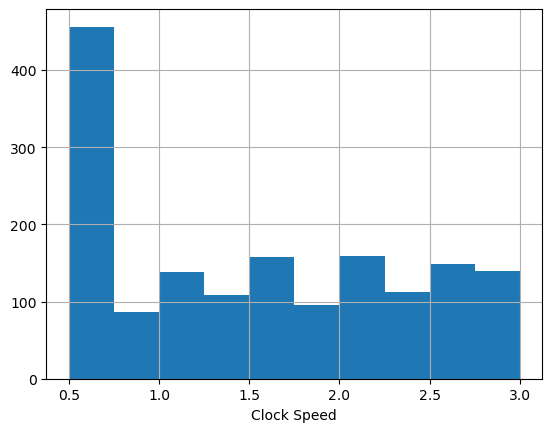

In [11]:
# Clock Speed Analysis
fig, ax = plt.subplots()

ax.hist(X_train_all['clock_speed'].sort_values())
plt.xlabel("Clock Speed")
plt.grid()
plt.show()

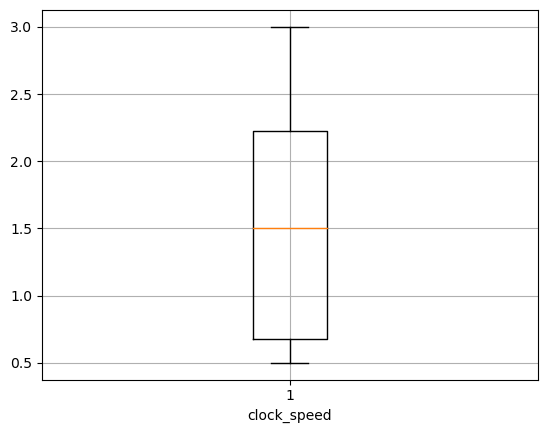

0.5
3.0


In [12]:
fig, ax = plt.subplots()

box_data = ax.boxplot(X_train_all['clock_speed'].sort_values())
plt.xlabel("clock_speed")
plt.grid()
plt.show()

for i in box_data['whiskers']:
    print(i.get_ydata()[1])
    
# no outliers

In [13]:
X_train_all['clock_speed'].value_counts()
# Around 20% of mobile are with 0.5 clock_speed (Total Sample Count: 2000 x 80% = 1600)

0.5    343
2.8     67
2.3     65
2.5     62
2.1     62
2.0     57
0.6     57
0.7     56
1.4     55
1.5     55
1.6     54
1.3     53
2.9     51
1.0     49
1.7     49
1.9     48
1.2     48
1.8     47
2.4     47
0.8     47
2.7     44
2.6     43
1.1     41
2.2     40
0.9     39
3.0     21
Name: clock_speed, dtype: int64

### Analyse fc

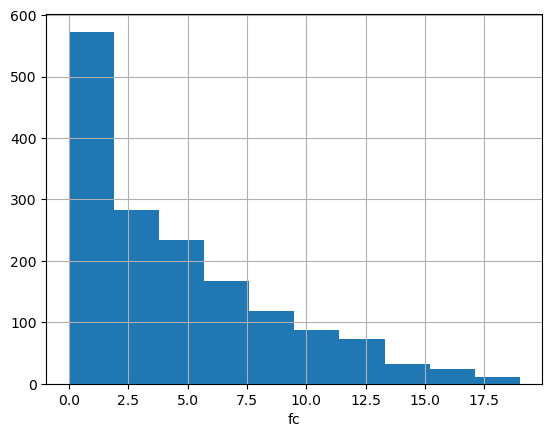

In [14]:
# Front Camera Pixel Analysis
fig, ax = plt.subplots()

ax.hist(X_train_all['fc'].sort_values())
plt.xlabel("fc")
plt.grid()
plt.show()

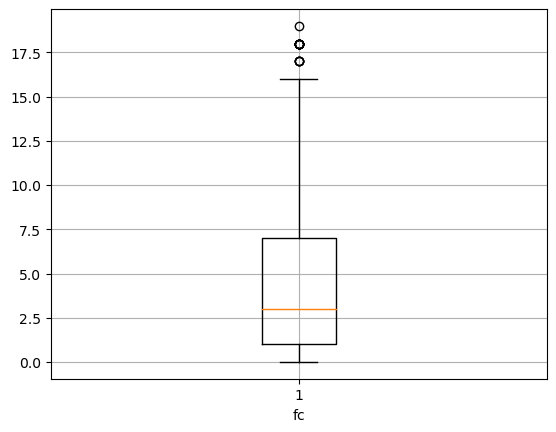

0.0
16.0


In [15]:
fig, ax = plt.subplots()

box_data = ax.boxplot(X_train_all['fc'].sort_values())
plt.xlabel("fc")
plt.grid()
plt.show()

for i in box_data['whiskers']:
    print(i.get_ydata()[1])
    
# some outliers outside 16.0

0      378
1      573
2      722
3      855
5      979
4     1089
6     1176
7     1256
8     1315
9     1374
10    1421
11    1461
12    1500
13    1533
16    1553
15    1570
14    1585
18    1595
17    1599
19    1600
Name: fc, dtype: int64


<Axes: >

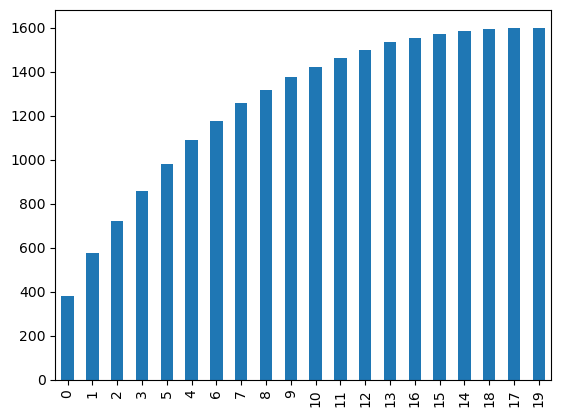

In [16]:
print(X_train_all['fc'].value_counts().cumsum())
X_train_all['fc'].value_counts().cumsum().plot(kind = "bar")
# Over 50% of mobile are with 3 mega pixels or less
# Over 75% of mobile are with 6 mega pixels or less

### Analyse px_height

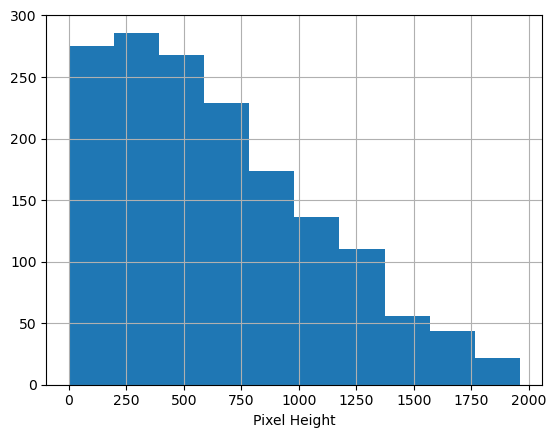

In [17]:
# Pixel Height Analysis
fig, ax = plt.subplots()

ax.hist(X_train_all['px_height'].sort_values())
plt.xlabel("Pixel Height")
plt.grid()
plt.show()

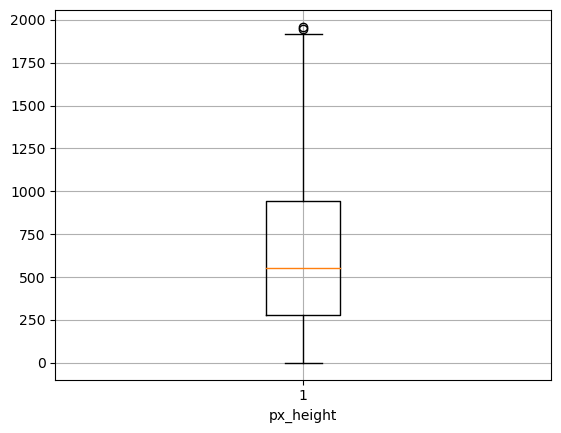

0.0
1920.0


In [18]:
fig, ax = plt.subplots()

box_data = ax.boxplot(X_train_all['px_height'].sort_values())
plt.xlabel("px_height")
plt.grid()
plt.show()

for i in box_data['whiskers']:
    print(i.get_ydata()[1])
    
# some outliers outside 1920.0

In [19]:
(X_train_all['px_height'] == 0).sum()

2

In [20]:
# Warning !! There are 2 row with px.height of 0, which could be a misleading data.

### Analyse sc_w (Screen Width)

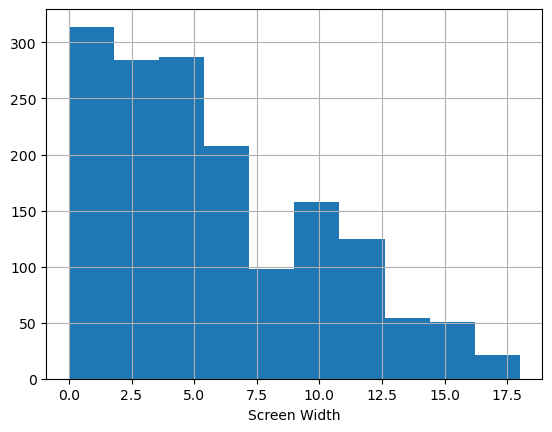

In [21]:
# Screen Width Analysis
fig, ax = plt.subplots()

ax.hist(X_train_all['sc_w'].sort_values())
plt.xlabel("Screen Width")
plt.grid()
plt.show()

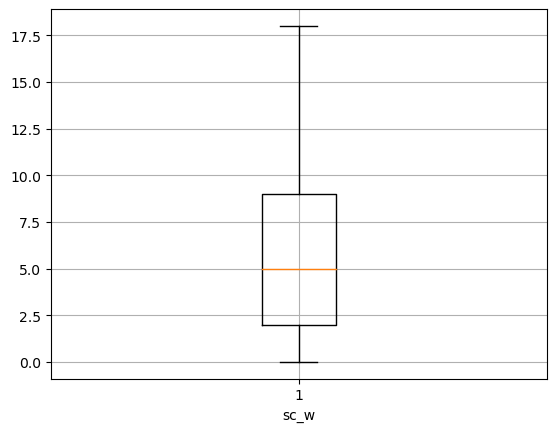

0.0
18.0


In [22]:
fig, ax = plt.subplots()

box_data = ax.boxplot(X_train_all['sc_w'].sort_values())
plt.xlabel("sc_w")
plt.grid()
plt.show()

for i in box_data['whiskers']:
    print(i.get_ydata()[1])
    
# No outlier

In [23]:
(X_train_all['sc_w'] == 0).sum()

150

In [24]:
# Warning !! There are 150 row with px.height of 0, which could be a misleading data.

### Analyse three_g

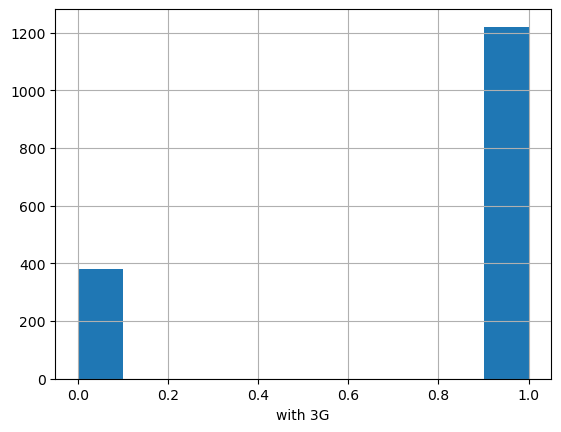

In [25]:
# 3G Analysis
fig, ax = plt.subplots()

ax.hist(X_train_all['three_g'].sort_values())
plt.xlabel("with 3G")
plt.grid()
plt.show()

In [26]:
print(X_train_all['three_g'].value_counts())
# Data Imbalanced

1    1221
0     379
Name: three_g, dtype: int64


## Try remove some problematic data

In [27]:
# Remove problematic row
criteria = (X_train_all["sc_w"] == 0) | (X_train_all["px_height"] == 0)
cleaned_X_train_all = X_train_all[~criteria]

# Remove 
outlier = (cleaned_X_train_all["fc"] > 16) | (cleaned_X_train_all["px_height"] > 1920)
cleaned_X_train_all = cleaned_X_train_all[~outlier]

y_criteria = (y_train_all.index.isin(cleaned_X_train_all.index))
cleaned_y_train_all = y_train_all[y_criteria]

## Normalization

In [28]:
norm_cleaned_X_train_all=MinMaxScaler(feature_range=(0,1)).fit_transform(cleaned_X_train_all)
norm_cleaned_X_train_all=pd.DataFrame(norm_cleaned_X_train_all,columns=cleaned_X_train_all.columns)
norm_cleaned_X_train_all.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.949900,0.0,0.00,1.0,0.4375,0.0,0.709677,0.444444,0.925000,0.000000,0.50,0.399166,0.840347,0.329144,0.357143,0.470588,0.055556,1.0,1.0,1.0
1,0.088176,1.0,0.68,0.0,0.0000,1.0,0.758065,0.000000,0.491667,1.000000,0.05,0.275143,0.339345,0.882888,0.428571,0.000000,0.777778,1.0,1.0,1.0
2,0.490982,0.0,0.16,1.0,0.1250,1.0,0.887097,0.000000,0.900000,0.000000,0.70,0.268890,0.205745,0.306952,0.642857,0.647059,1.000000,1.0,0.0,1.0
3,0.187041,0.0,0.24,0.0,0.1250,0.0,0.580645,0.333333,0.983333,0.571429,0.35,0.157895,0.783567,0.868984,0.571429,0.411765,0.166667,0.0,0.0,1.0
4,0.637943,1.0,0.00,1.0,0.4375,0.0,0.080645,0.333333,0.208333,0.571429,0.60,0.428348,0.402806,0.355348,0.071429,0.235294,1.000000,1.0,0.0,1.0


In [29]:
norm_clean_X_test=MinMaxScaler(feature_range=(0,1)).fit_transform(X_test)
norm_clean_X_test=pd.DataFrame(norm_clean_X_test,columns=X_test.columns)
norm_clean_X_test.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.767270,0.0,0.80,0.0,0.166667,1.0,0.370968,0.555556,1.000000,0.142857,0.25,0.110695,0.740147,0.115066,0.214286,0.333333,0.500000,1.0,1.0,0.0
1,0.456070,0.0,0.00,0.0,0.388889,1.0,0.096774,0.444444,0.483333,1.000000,0.80,0.144920,0.324649,0.617340,1.000000,0.944444,0.944444,1.0,0.0,0.0
2,0.985915,0.0,0.96,0.0,0.500000,0.0,0.193548,0.333333,0.966667,0.857143,0.90,0.154545,0.301937,0.283650,0.214286,0.055556,0.333333,1.0,1.0,0.0
3,0.326626,1.0,0.60,0.0,0.222222,0.0,0.241935,0.111111,0.716667,0.285714,0.95,0.134759,0.597194,0.972973,0.928571,0.388889,0.944444,1.0,1.0,0.0
4,0.075788,1.0,0.00,1.0,0.388889,0.0,0.903226,0.444444,0.416667,0.571429,0.40,0.543850,0.973948,0.441531,0.642857,0.277778,0.166667,1.0,0.0,0.0


## Apply Gradient Boosting with Grid Search and CV

In [30]:
# parameters 
parameters = {'n_estimators':[20,50,100,150], 'learning_rate':[0.01,0.02,0.05,0.1]}

# 5-fold cross validation
sk_gbc = GradientBoostingClassifier()
sk_gbc = GridSearchCV(estimator = sk_gbc,param_grid = parameters,cv = 5,verbose = 1,n_jobs = -1)

# Fit the model the all training data
sk_gbc.fit(cleaned_X_train_all,cleaned_y_train_all.values.ravel())

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.05, 0.1],
                         'n_estimators': [20, 50, 100, 150]},
             verbose=1)

In [31]:
sk_gbc.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [32]:
# Test with unseen data
y_test_pred = sk_gbc.predict(X_test)

# Model performance evaluation
print(f"Accuracy Score (Test Set): {accuracy_score(y_test,y_test_pred)}")
print(f"Weighted F1 Score (Test Set): {f1_score(y_test,y_test_pred,average = 'weighted')}")
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

Accuracy Score (Test Set): 0.905
Weighted F1 Score (Test Set): 0.9052932178116001
[[ 99   6   0   0]
 [  4  83   4   0]
 [  0   7  78   7]
 [  0   0  10 102]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       105
           1       0.86      0.91      0.89        91
           2       0.85      0.85      0.85        92
           3       0.94      0.91      0.92       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400



In [33]:
# For sklearn-gradient-boosting, we obtained around 91% of average accuracy

In [34]:
# Perhaps we can try some other methods like Random Forest